California dataset is perfect to practice different classification models. In this jupyter notebook, my task will be to 
1. Preprocess data
2. Training
3. Prediction
4. Evaluation
5. Comparison of multiple models
6. Checking if there is any underfitting or overfitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

In [3]:
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: >

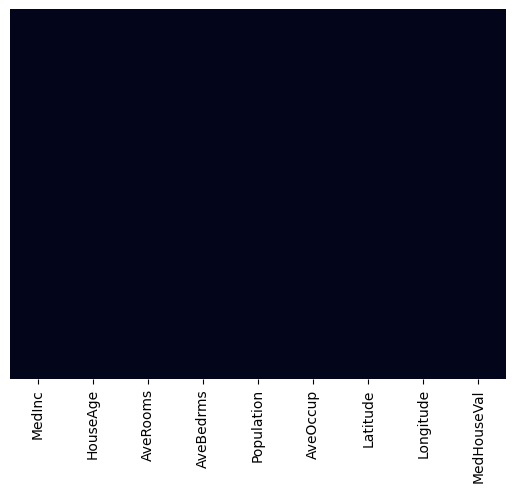

In [5]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

The dataset seems to be clean already.

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [6]:
X = data.data
y = data.target

In [8]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

JUST LIKE CLASSIFICATION I AM GOING TO USE DIFFERENT MODELS TO SELECT

In [12]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "DecisionTree": DecisionTreeRegressor(max_depth=10),
    "RandomForest": RandomForestRegressor(n_estimators=100),
    "SVR": SVR(kernel='rbf')
}

results = []

Model: LinearRegression
MSE: 0.5559
R²: 0.5758


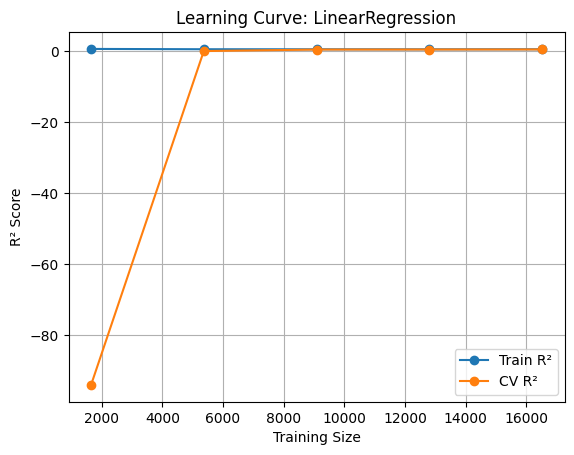

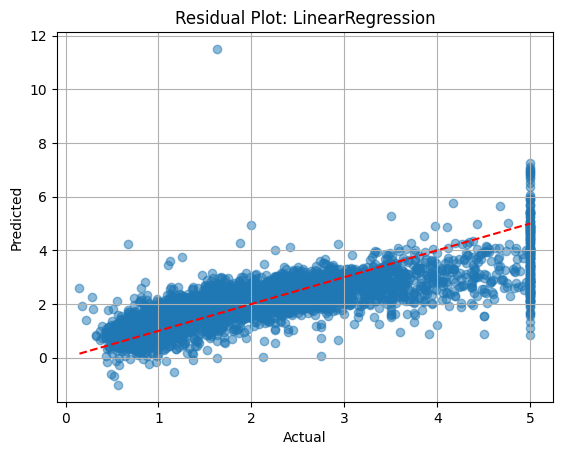

Model: Ridge
MSE: 0.5559
R²: 0.5758


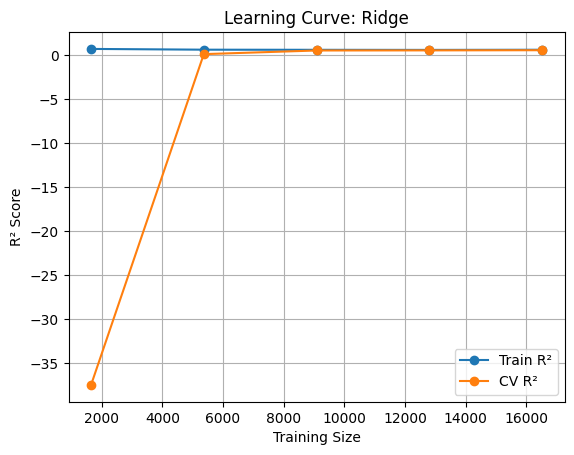

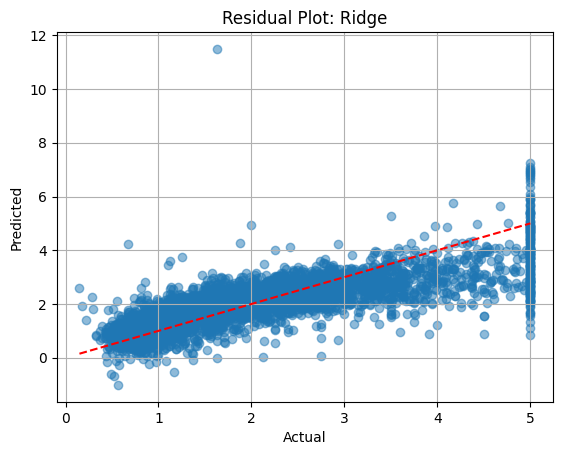

Model: DecisionTree
MSE: 0.4202
R²: 0.6793


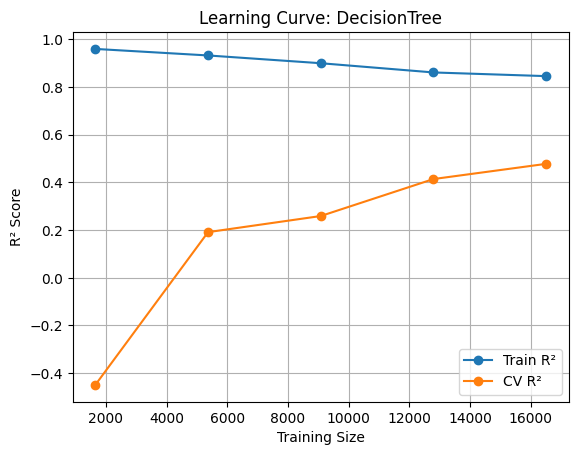

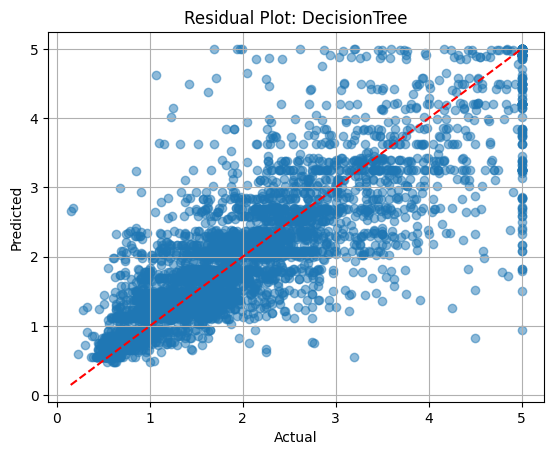

Model: RandomForest
MSE: 0.2564
R²: 0.8043


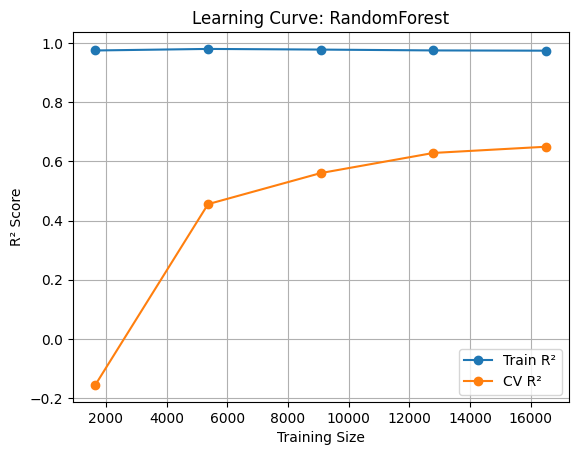

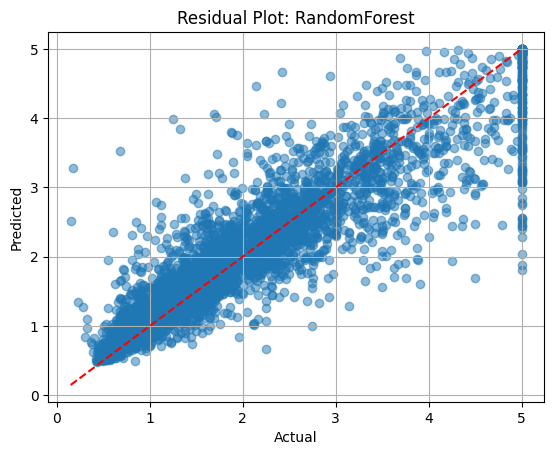

Model: SVR
MSE: 0.3552
R²: 0.7289


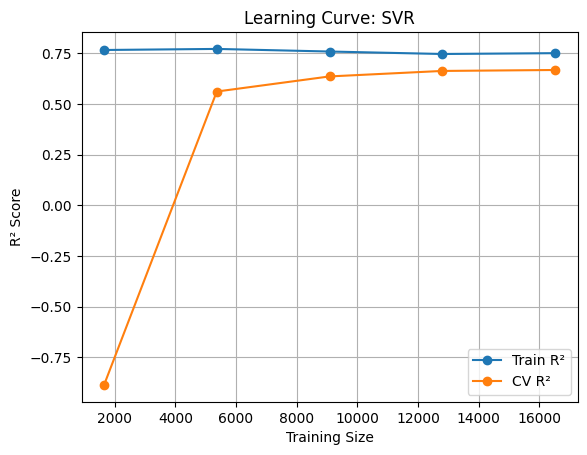

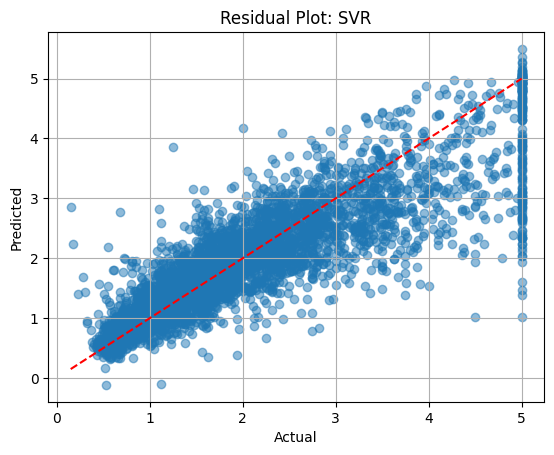

In [13]:
# Training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((name, mse, r2))
    print(f"Model: {name}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_scaled, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5)
    )
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Train R²")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="CV R²")
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training Size")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Residual plot
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.title(f"Residual Plot: {name}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.show()

In [14]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R²"])
print("Model Comparison:")
print(results_df)

Model Comparison:
              Model       MSE        R²
0  LinearRegression  0.555892  0.575788
1             Ridge  0.555851  0.575819
2      DecisionTree  0.420186  0.679347
3      RandomForest  0.256436  0.804308
4               SVR  0.355198  0.728941



LinearRegression - Confusion Matrix:
[[1424  652]
 [ 206 1846]]
LinearRegression - ROC-AUC Score: 0.8980

Ridge - Confusion Matrix:
[[1424  652]
 [ 206 1846]]
Ridge - ROC-AUC Score: 0.8980

DecisionTree - Confusion Matrix:
[[1706  370]
 [ 305 1747]]
DecisionTree - ROC-AUC Score: 0.9143

RandomForest - Confusion Matrix:
[[1762  314]
 [ 143 1909]]
RandomForest - ROC-AUC Score: 0.9544

SVR - Confusion Matrix:
[[1766  310]
 [ 260 1792]]
SVR - ROC-AUC Score: 0.9362


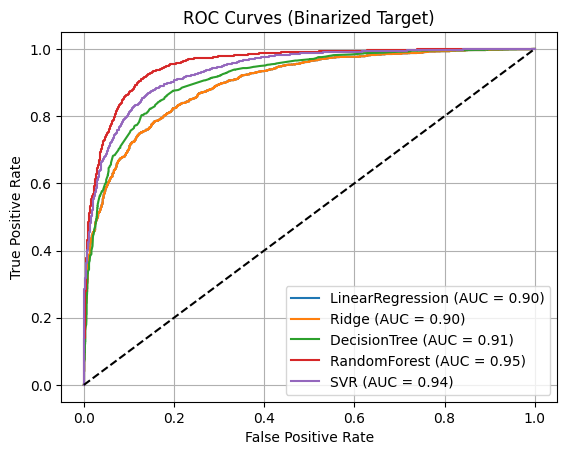

In [15]:
# Bonus: Binarize for Confusion Matrix and ROC-AUC
threshold = np.median(y)
y_test_bin = (y_test >= threshold).astype(int)

for name, model in models.items():
    y_pred_bin = (model.predict(X_test) >= threshold).astype(int)
    cm = confusion_matrix(y_test_bin, y_pred_bin)
    auc = roc_auc_score(y_test_bin, model.predict(X_test))

    print(f"\n{name} - Confusion Matrix:\n{cm}")
    print(f"{name} - ROC-AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test_bin, model.predict(X_test))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves (Binarized Target)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

Since RandomForest is clearly giving the best output. Let's try to tune it and find the best version using GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

In [21]:
#hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2', 'sqrt']
}

In [22]:
#model
rf = RandomForestRegressor(random_state=42)

#Use GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2',
                           verbose=2)

In [23]:
# Fit to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [24]:
# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [25]:
# Evaluate best model
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Random Forest Results:")
print(f"MSE: {mse}")
print(f"R²: {r2}")

Optimized Random Forest Results:
MSE: 0.24146138150261248
R²: 0.8157358614661268


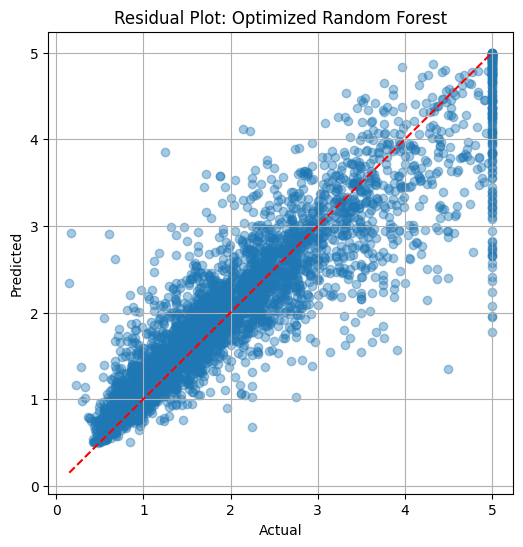

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Residual Plot: Optimized Random Forest")
plt.grid(True)
plt.show()

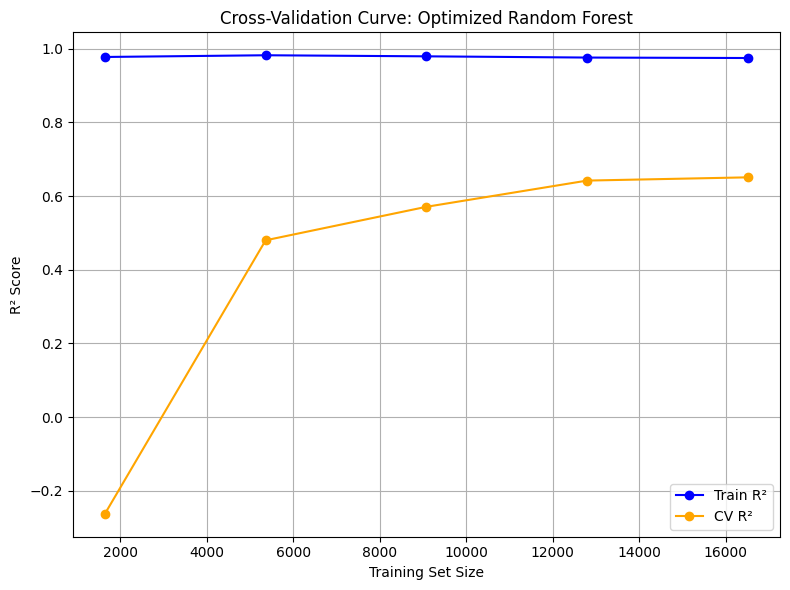

In [28]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_rf,
    X=X_scaled,
    y=y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='r2',
    n_jobs=-1
)

# Calculate mean R² scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Train R²", color='blue')
plt.plot(train_sizes, test_mean, 'o-', label="CV R²", color='orange')
plt.title("Cross-Validation Curve: Optimized Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We have successfully obtained better precision with tuning